In [38]:
import numpy as np 
import pandas as pd
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 

In [39]:
!curl -O https://maktabkhooneh.org/media/courses/projects/1632560262896716.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3981  100  3981    0     0  14392      0 --:--:-- --:--:-- --:--:-- 14529


In [40]:
df = pd.read_csv('1632560262896716.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
print(df.dtypes)
df.shape

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


(200, 5)

In [42]:
X = df.values[:,1:]
X = np.nan_to_num(X)

In [43]:
from sklearn import preprocessing
le_gender = preprocessing.LabelEncoder()
le_gender.fit(['Female','Male'])
X[:,0] = le_gender.transform(X[:,0]) 
X[0:5]

array([[1, 19, 15, 39],
       [1, 21, 15, 81],
       [0, 20, 16, 6],
       [0, 23, 16, 77],
       [0, 31, 17, 40]], dtype=object)

In [44]:
df[['Incom', 'Score']] = df[[ 'Annual Income (k$)', 'Spending Score (1-100)']]
df = df.drop('Annual Income (k$)', axis=1)
df = df.drop('Spending Score (1-100)', axis=1)
df

,CustomerID,Gender,Age,Incom,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [45]:
from sklearn.preprocessing import StandardScaler
mtx = StandardScaler().fit_transform(X)
mtx

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [46]:
from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(mtx,mtx) 
print(dist)

[[0.         1.63681098 2.38878538 ... 4.54611614 4.81867651 5.02250496]
 [1.63681098 0.         3.54154808 ... 4.3182849  5.31878915 4.70189264]
 [2.38878538 3.54154808 0.         ... 5.42195122 5.13299938 5.90251765]
 ...
 [4.54611614 4.3182849  5.42195122 ... 0.         2.21418015 0.5647686 ]
 [4.81867651 5.31878915 5.13299938 ... 2.21418015 0.         2.5274803 ]
 [5.02250496 4.70189264 5.90251765 ... 0.5647686  2.5274803  0.        ]]


In [47]:
Z_dist = hierarchy.linkage(dist, 'complete')

C:\Users\user\AppData\Local\Temp\ipykernel_27548\4219156479.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_dist = hierarchy.linkage(dist, 'complete')


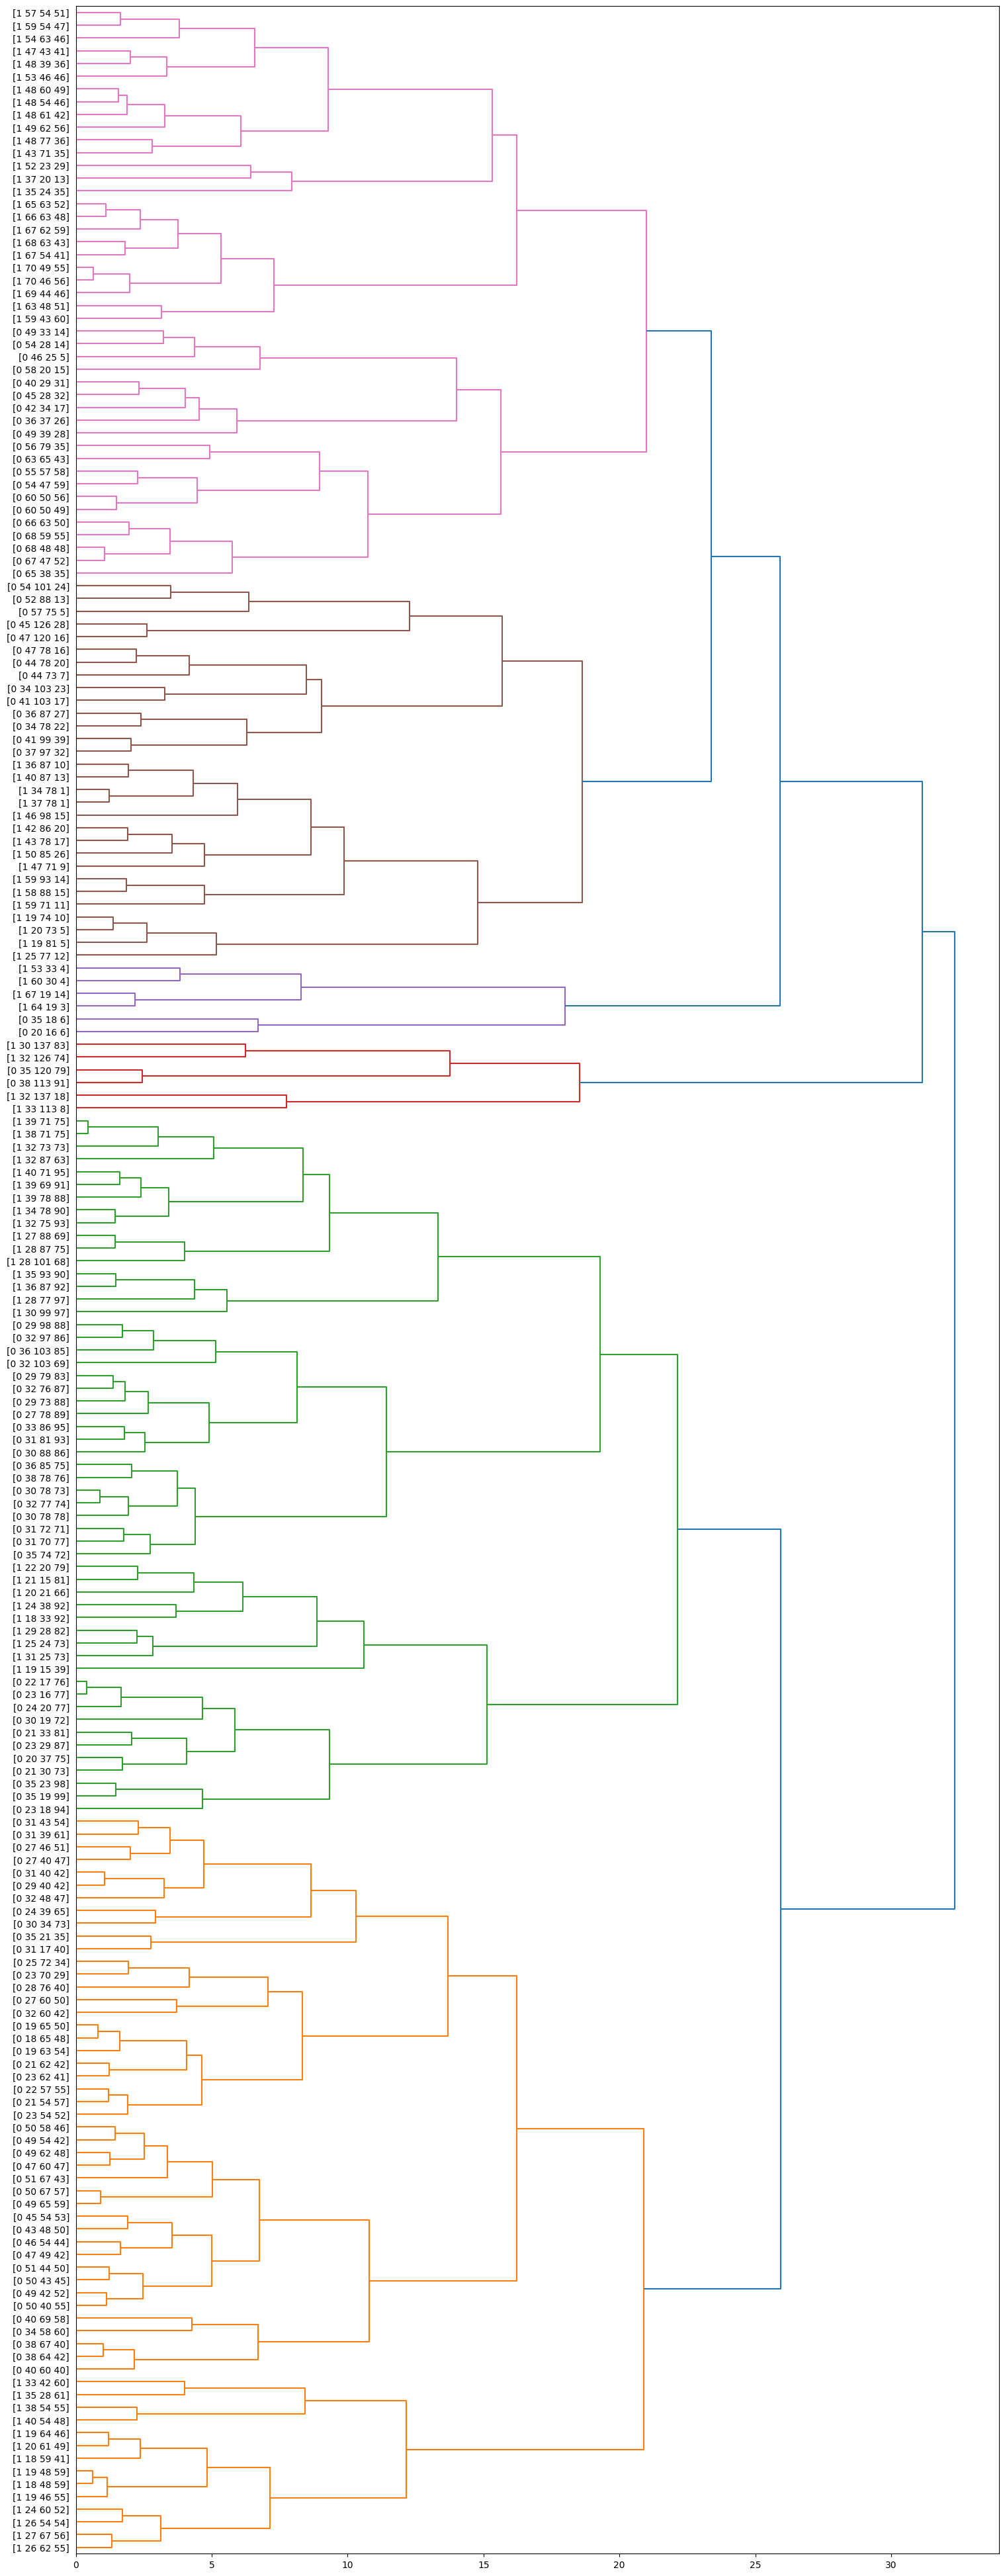

In [50]:
import pylab
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s %s]' % (X[id][0],X[id][1],X[id][2],X[id][3])
    
dendrogram = hierarchy.dendrogram(Z_dist,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =10, orientation = 'right')

In [51]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom.fit(dist)
agglom.labels_

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_agglomerative.py:566: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 3, 0, 1, 4, 1, 4, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3,
       3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 2,
       2, 2], dtype=int64)

In [52]:
df['cluster_'] = agglom.labels_
df.head()

,CustomerID,Gender,Age,Incom,Score,cluster_
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'Score')

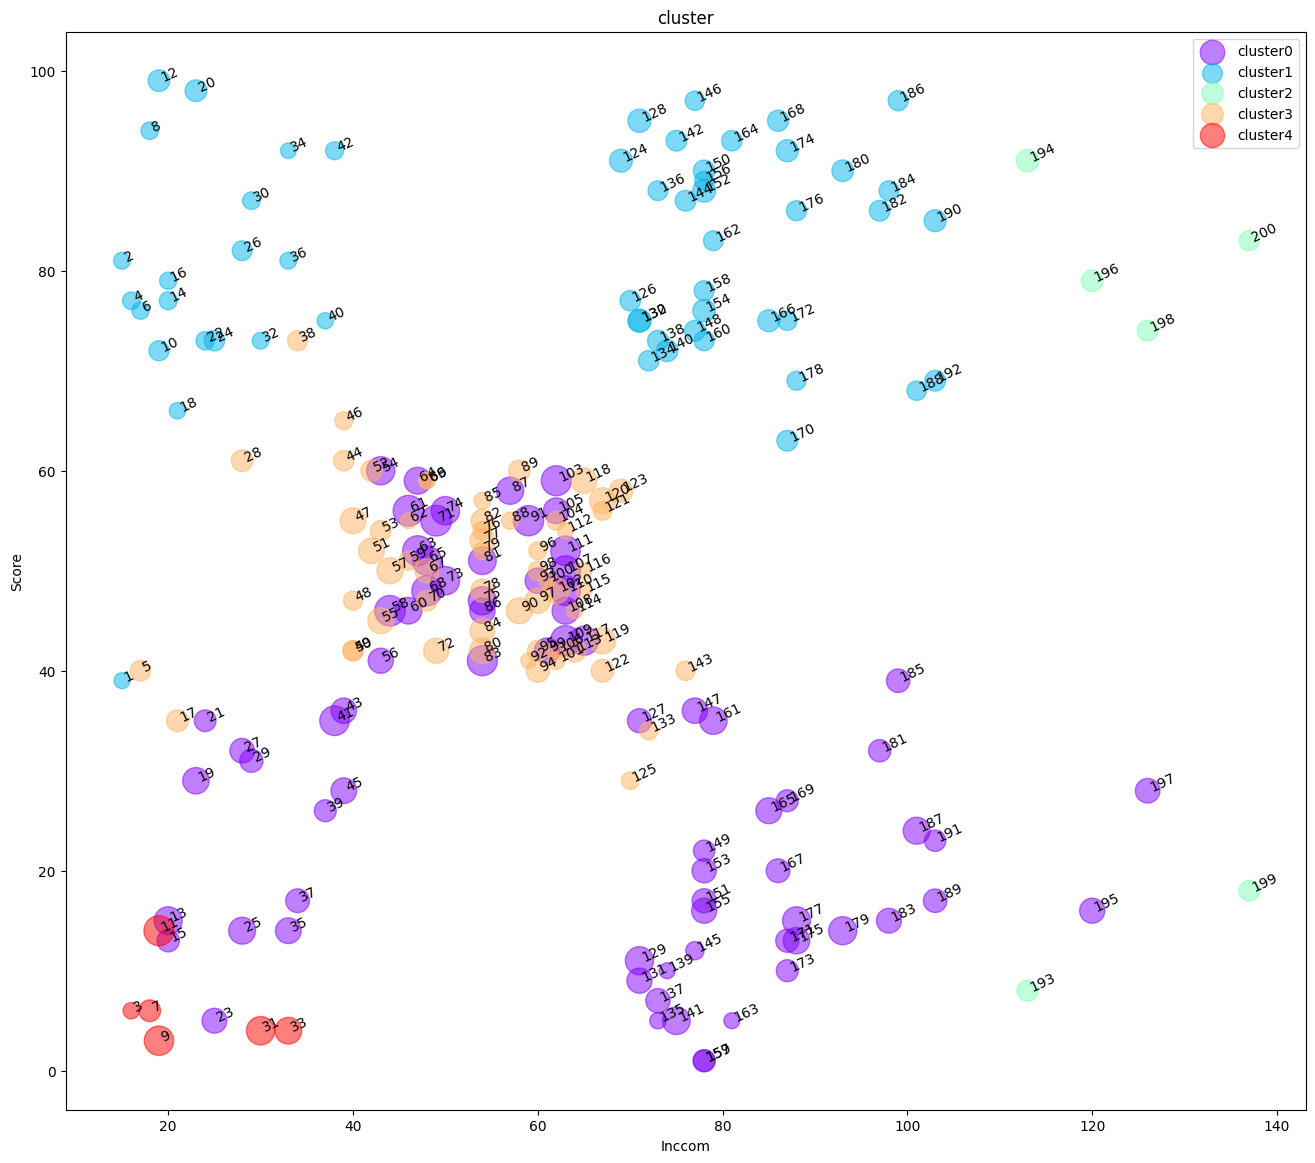

In [53]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Incom[i], subset.Score[i] ,str(subset['CustomerID'][i]) ,rotation=25) 
    plt.scatter(subset.Incom, subset.Score, s= subset.Age*7, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('cluster')
plt.xlabel('Inccom')
plt.ylabel('Score')